In [ ]:
from keras import models
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
# from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [ ]:
!pip install livelossplot

In [ ]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

In [ ]:
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

In [ ]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


In [ ]:
y_train[8]

1

In [ ]:
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 230,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 254,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 255,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 254,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 254, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,
        239, 254, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 162,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        113, 254, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         83, 254, 245,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         79, 254, 246,  38,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 214, 254, 150,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 144, 241,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 144, 240,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 144, 254,  82,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 230, 247,  40,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Train label --------------------->>> 1


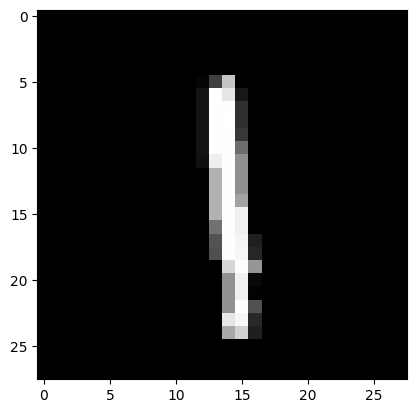

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# pick a sample to plot
sample = 8
print("Train label --------------------->>>",y_train[sample])
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()


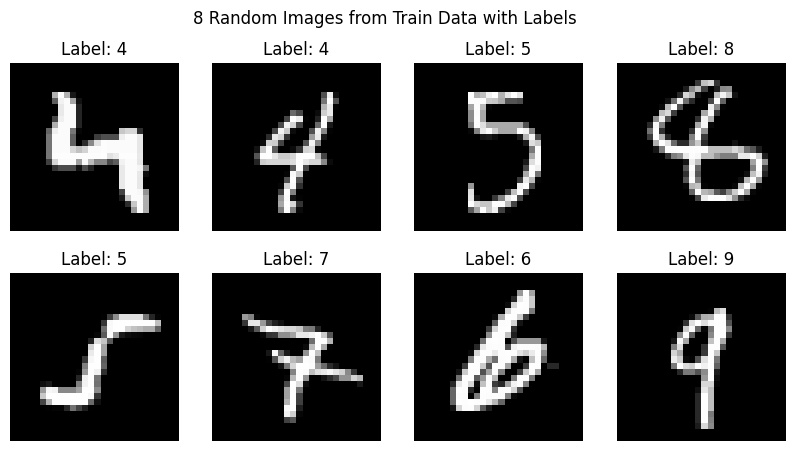

In [ ]:
# prompt: use the above code to plot 8 random images from train data along with it's actual label

import matplotlib.pyplot as plt
import random

# Select 8 random indices from the training set
random_indices = random.sample(range(len(X_train)), 8)

# Plot the images and their corresponding labels
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, index in enumerate(random_indices):
    ax = axes[i // 4, i % 4]
    ax.imshow(X_train[index], cmap="gray")
    ax.set_title(f"Label: {y_train[index]}")
    ax.axis("off")

plt.suptitle("8 Random Images from Train Data with Labels")
plt.show()


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
import numpy as np
np.unique(y_train)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [ ]:
X_train.shape[0]

60000

In [ ]:
(X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))).shape

(60000, 784)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [ ]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Build neural network
model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_32 (Dense)            (None, 10)               

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


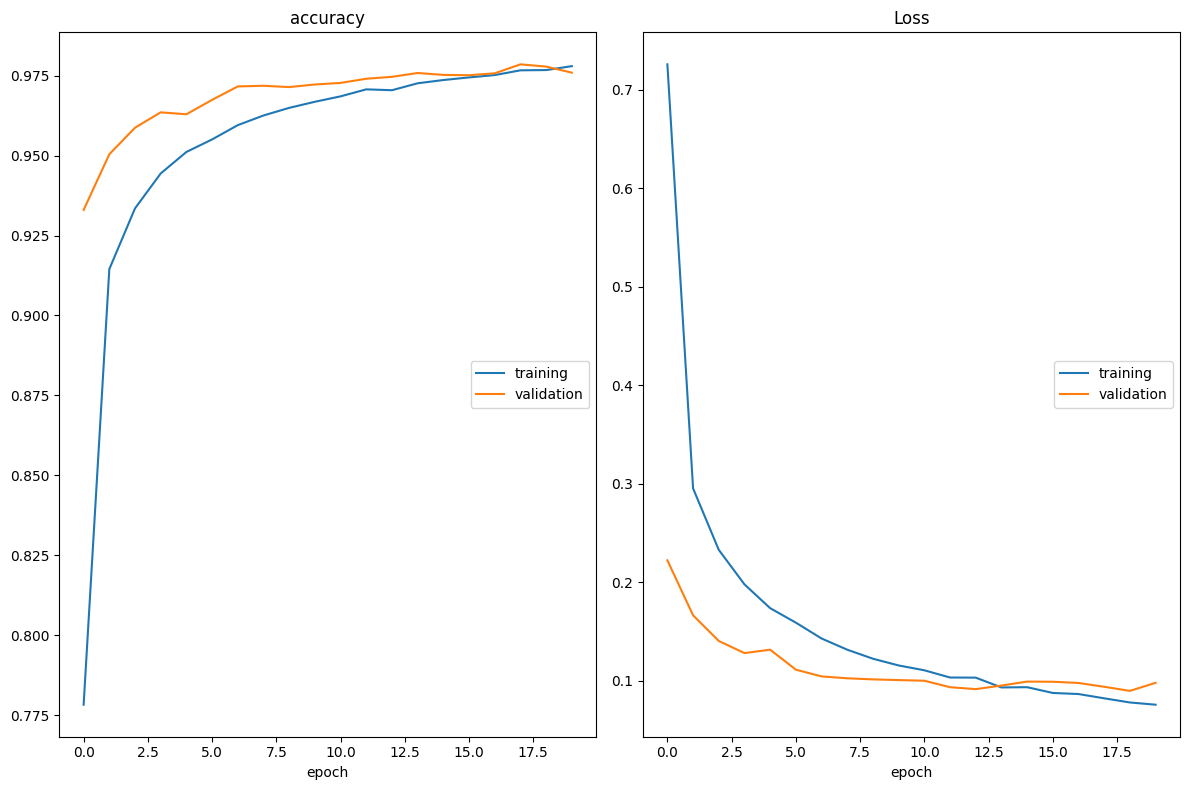

accuracy
	training         	 (min:    0.778, max:    0.978, cur:    0.978)
	validation       	 (min:    0.933, max:    0.979, cur:    0.976)
Loss
	training         	 (min:    0.076, max:    0.726, cur:    0.076)
	validation       	 (min:    0.090, max:    0.222, cur:    0.098)
469/469 [==============================] - 4s 8ms/step - loss: 0.0756 - accuracy: 0.9779 - val_loss: 0.0978 - val_accuracy: 0.9759


In [ ]:

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=20,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, y_test))


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05631003528833389
Test accuracy: 0.9832000136375427


In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[15]

array([5.4877713e-11, 4.9676805e-07, 2.3957785e-08, 7.7533382e-03,
       1.1084954e-09, 9.9213636e-01, 4.6541612e-07, 1.1154913e-07,
       1.0259150e-04, 6.5681315e-06], dtype=float32)

In [ ]:
y_test[15]

5

Test label --------------------->>> 5


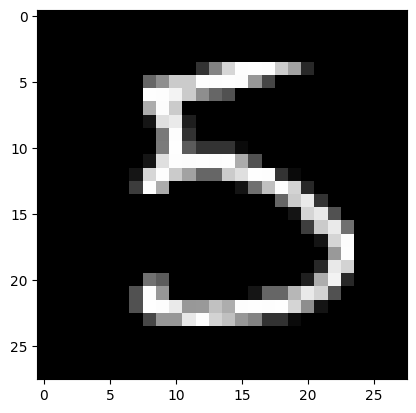

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline

# pick a sample to plot
sample = 15
print("Test label --------------------->>>",y_test[sample])
image = X_test[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()


In [ ]:
y_test[0]

7

In [ ]:
# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))